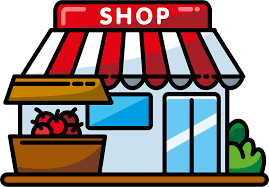

# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

## Kaggle Dataset Description 

Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.

Data Size: This file contains 1000 rows and 10 columns.

Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.

Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.

Date of Last Update: The dataset was last updated on March 31, 2023.

Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.

Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

# Aim 

This dataset was gotten of kaggle.com though not much informattion is given on the site the name of the dataset is "Balaji Fast Food Sales" which means the dataset is for a proposed fictional or non fictional fast food restaurant 'Balaji'. From here we will go on to carry out analyze in order to;

* Understanding customer preferences for different items.
* Evaluating the impact of payment methods on revenue.
* Investigating the performance of staff members based on gender.
* Exploring the popularity of items at different times of the day.

Columns in the dataset ; 

1) order_id: a unique identifier for each order.
2) date: date of the transaction.
3) item_name: name of the food.
4) item_type: category of item (Fastfood or Beverages).
5) item_price: price of the item for 1 quantity.
6) Quantity: how much quantity the customer orders.
7) transaction_amount: the total amount paid by customers.
8) transaction_type: payment method (cash, online, others).
9) received_by: gender of the person handling the transaction.
10) time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

In [2]:
data = pd.read_csv('Balaji Fast Food Sales.csv')

In [3]:
data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


From the above dataset we can see that the date column has some values that are not in the same format 
Here we need to clean and process the data but before this we check for null calues.

In [4]:
data.columns 

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

# Data Preprocessing 

In [5]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

From here we can see that transaction type has 107 null values under here we can classify the transactions with Null values as 'others'

In [6]:
#replace null values in the transaction type 
data.fillna('others', inplace=True)

In [7]:
data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,others,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,others,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,others,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,others,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,others,Mrs.,Afternoon


From the date column we can see that we have two different formats and that doesn't look too nice so we work on that 

In [8]:
#summary statistics 
summary_stats = data.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
          order_id   item_price     quantity  transaction_amount
count  1000.000000  1000.000000  1000.000000         1000.000000
mean    500.500000    33.315000     8.162000          275.230000
std     288.819436    14.921744     4.413075          204.402979
min       1.000000    20.000000     1.000000           20.000000
25%     250.750000    20.000000     4.000000          120.000000
50%     500.500000    25.000000     8.000000          240.000000
75%     750.250000    50.000000    12.000000          360.000000
max    1000.000000    60.000000    15.000000          900.000000


# Exploratory Data Analysis 

# Data Insights 

###### items in the dataset 

In [9]:
unique_item_names = data['item_name'].unique()

print('Unique Item Names:')
for item_name in unique_item_names:
    print(item_name)

Unique Item Names:
Aalopuri
Vadapav
Sugarcane juice
Panipuri
Frankie
Sandwich
Cold coffee


##### Total quantity of goods sold 

In [10]:
total_quantity_sold = data['quantity'].sum()

print(f'Total Quantity of Goods Sold: {total_quantity_sold}')

Total Quantity of Goods Sold: 8162


##### Quantity of good sold for each item 

In [11]:
total_quantity_sold_by_item = data.groupby('item_name')['quantity'].sum().reset_index()

print('Total Quantity of Goods Sold for Each Item:')
print(total_quantity_sold_by_item)

Total Quantity of Goods Sold for Each Item:
         item_name  quantity
0         Aalopuri      1044
1      Cold coffee      1361
2          Frankie      1150
3         Panipuri      1226
4         Sandwich      1097
5  Sugarcane juice      1278
6          Vadapav      1006


Cold coffee has the highest quantity purchased. 

## Exploring the popularity of items at different times of the day.

##### What time had the highest number of sales ?

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


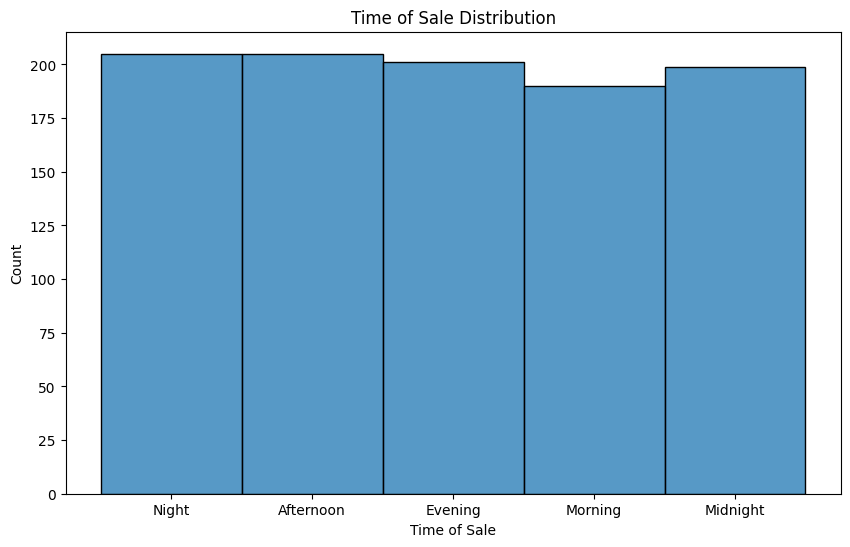

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['time_of_sale'], bins=24)
plt.title('Time of Sale Distribution')
plt.xlabel('Time of Sale')
plt.ylabel('Count')
plt.show()

Afternoon and Night record the highest number of sales.

What time of sale had the highest number of goods purchased?

In [13]:
total_quantity_sold_by_date = data.groupby('time_of_sale')['quantity'].sum().reset_index()

print('Quantity of Items Sold by Date:')
print(total_quantity_sold_by_date)

Quantity of Items Sold by Date:
  time_of_sale  quantity
0    Afternoon      1714
1      Evening      1540
2     Midnight      1575
3      Morning      1574
4        Night      1759


1759 items sold at Night 

Goods that sold the higest during time_of_sales

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

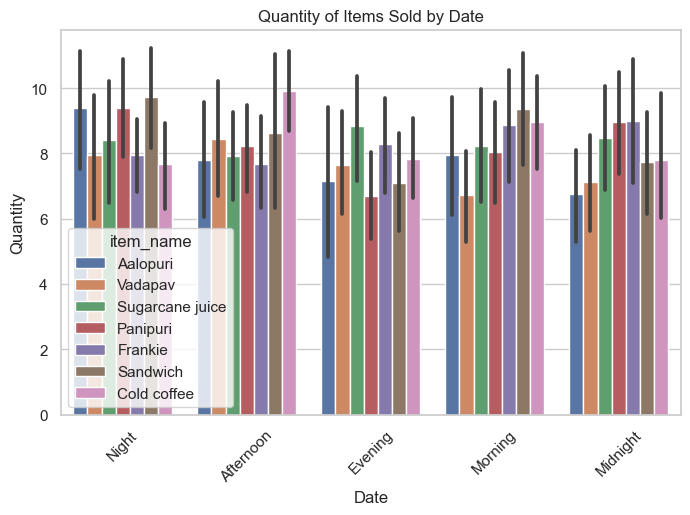

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x='time_of_sale', y='quantity', hue='item_name', data=data)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity of Items Sold by Date')
plt.show()

In [15]:
total_quantity_sold_by_date = data.groupby(['time_of_sale', 'item_name'])['quantity'].sum().reset_index()

# Print or display the result
print('Quantity of Items Sold by Date:')
print(total_quantity_sold_by_date)

Quantity of Items Sold by Date:
   time_of_sale        item_name  quantity
0     Afternoon         Aalopuri       226
1     Afternoon      Cold coffee       337
2     Afternoon          Frankie       238
3     Afternoon         Panipuri       230
4     Afternoon         Sandwich       164
5     Afternoon  Sugarcane juice       325
6     Afternoon          Vadapav       194
7       Evening         Aalopuri       136
8       Evening      Cold coffee       235
9       Evening          Frankie       240
10      Evening         Panipuri       241
11      Evening         Sandwich       206
12      Evening  Sugarcane juice       283
13      Evening          Vadapav       199
14     Midnight         Aalopuri       223
15     Midnight      Cold coffee       203
16     Midnight          Frankie       198
17     Midnight         Panipuri       278
18     Midnight         Sandwich       201
19     Midnight  Sugarcane juice       237
20     Midnight          Vadapav       235
21      Morning       

From the inference drawn:

In the Afternoon, Cold coffee sold the highest with a quantity of 337,
followed by Sugarcane juice with a quantity of 325

In the Evening, Sugarcane juice sold the highest with a quantity of 283
followed by Panipuri with a quantity of 241

At Midnight, Panipuri sold the highest with a quantity of 278
followed by Sugarcane juice with a quantity of 237

In the Morning, Cold coffee sold the highest with a quantity of 287
followed by Sandwich  with a quantity of 234

At Night, Cold coffee sold the highest with a quantity of 299
followed by Sandwich  juice with a quantity of 292


## Evaluating the impact of payment methods on revenue.

##### Which payment method was used most for each item based on Transaction amount and quantity 

##### Based on transaction amount 

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Aalopuri'),
  Text(1, 0, 'Cold coffee'),
  Text(2, 0, 'Frankie'),
  Text(3, 0, 'Panipuri'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Sugarcane juice'),
  Text(6, 0, 'Vadapav')])

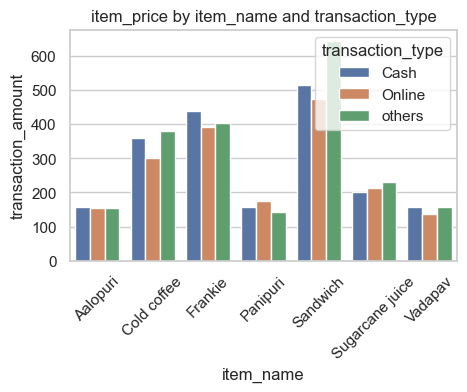

In [16]:
avg_price_by_room_city = data.groupby(['item_name', 'transaction_type'])['transaction_amount'].mean().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(data=avg_price_by_room_city, x='item_name', y='transaction_amount', hue='transaction_type')
plt.title('item_price by item_name and transaction_type')
plt.xlabel('item_name')
plt.ylabel('transaction_amount')
plt.xticks(rotation=45)


From the above plot we can see that The transaction_amounts are high for for Aalopuri, Frankie, Sandwich and Vadapav are at highest.

##### Based on quantity

In [17]:
total_quantity_sold_by_date = data.groupby(['transaction_type', 'item_name'])['quantity'].sum().reset_index()

# Print or display the result
print('Quantity of Items Sold by Transaction_type:')
print(total_quantity_sold_by_date)

Quantity of Items Sold by Transaction_type:
   transaction_type        item_name  quantity
0              Cash         Aalopuri       519
1              Cash      Cold coffee       647
2              Cash          Frankie       544
3              Cash         Panipuri       552
4              Cash         Sandwich       542
5              Cash  Sugarcane juice       608
6              Cash          Vadapav       531
7            Online         Aalopuri       409
8            Online      Cold coffee       495
9            Online          Frankie       509
10           Online         Panipuri       567
11           Online         Sandwich       426
12           Online  Sugarcane juice       513
13           Online          Vadapav       372
14           others         Aalopuri       116
15           others      Cold coffee       219
16           others          Frankie        97
17           others         Panipuri       107
18           others         Sandwich       129
19           oth


Amongst all items the highest cash transactions was from cold coffee 

Panipuri was mostly paid for by online means.


###### Which payment method was used most at what time of sales ?

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Midnight'),
  Text(3, 0, 'Morning'),
  Text(4, 0, 'Night')])

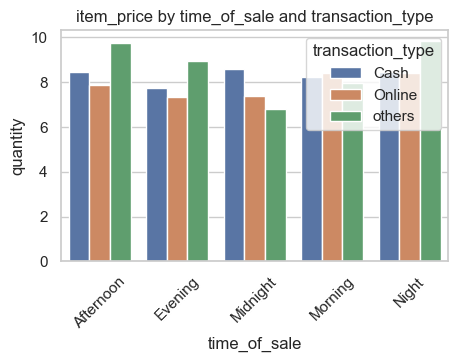

In [18]:
avg_price_by_room_city = data.groupby(['time_of_sale', 'transaction_type'])['quantity'].mean().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(data=avg_price_by_room_city, x='time_of_sale', y='quantity', hue='transaction_type')
plt.title('item_price by time_of_sale and transaction_type')
plt.xlabel('time_of_sale')
plt.ylabel('quantity')
plt.xticks(rotation=45)

## Investigating the performance of staff members based on gender.

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

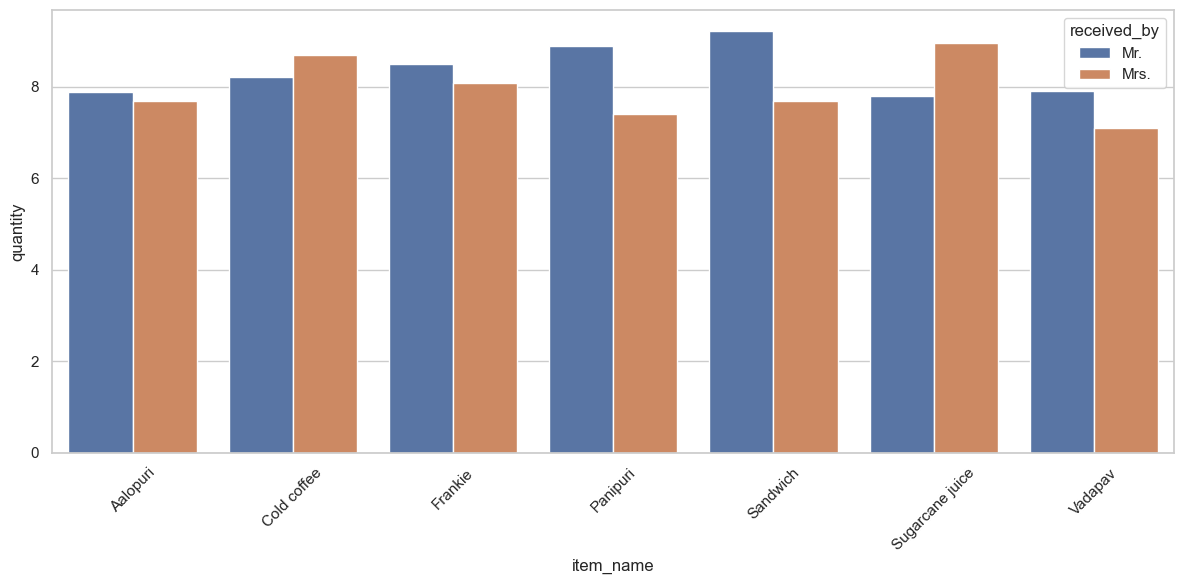

In [19]:
avg_price_by_room_city = data.groupby(['item_name', 'received_by'])['quantity'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_room_city, x='item_name', y='quantity', hue='received_by')
plt.xlabel('item_name')
plt.ylabel('quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Males handled most of the transactions 

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

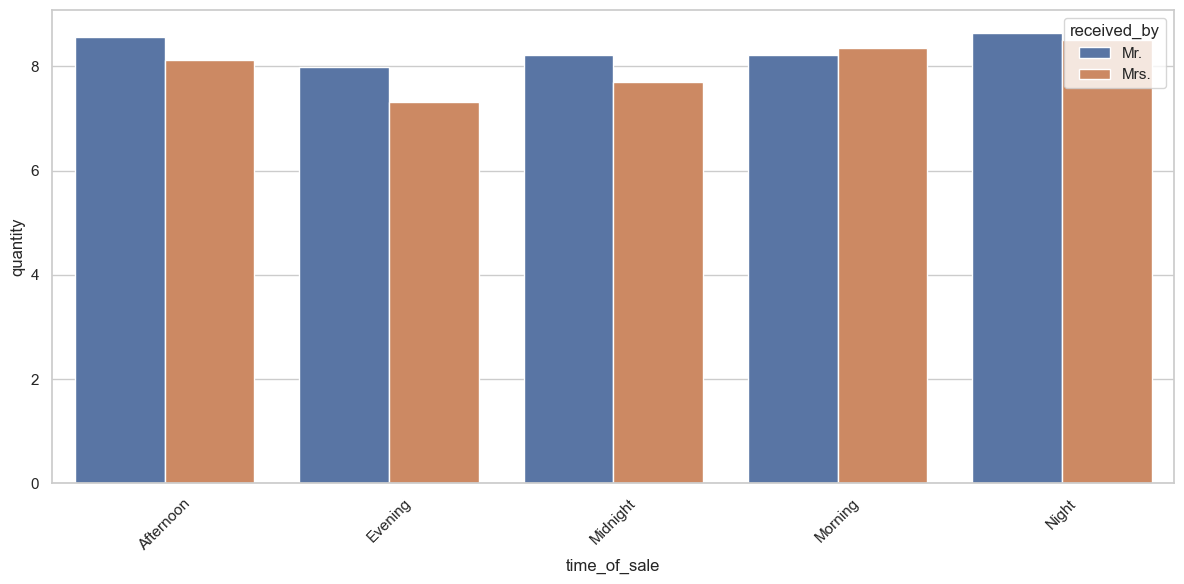

In [20]:
avg_price_by_room_city = data.groupby(['time_of_sale', 'received_by'])['quantity'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_room_city, x='time_of_sale', y='quantity', hue='received_by')
plt.xlabel('time_of_sale')
plt.ylabel('quantity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Highest quantiy of items sold happened at Night and was handled by a Male.

## Understanding customer preferences for different items.

Text(0, 0.5, 'Total Quantity Sold')

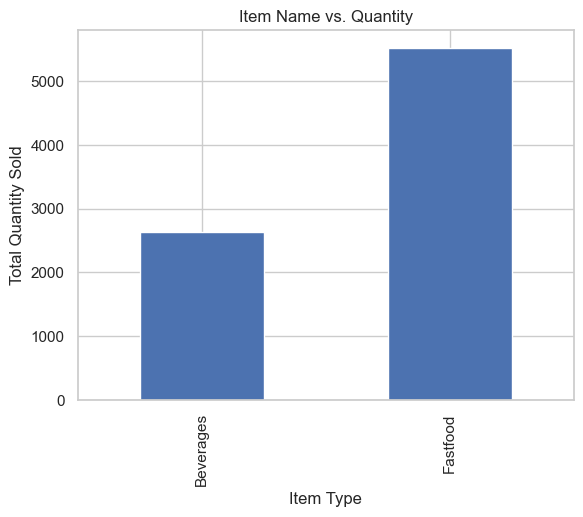

In [21]:
item_quantity = data.groupby('item_type')['quantity'].sum()
item_quantity.plot(kind='bar', title='Item Name vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

Most Customers Purchase Beverages instead of fast food 

In [22]:
data.sample(5)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
755,756,10/21/2022,Sugarcane juice,Beverages,25,10,250,Online,Mrs.,Morning
672,673,9/17/2022,Sandwich,Fastfood,60,12,720,Cash,Mr.,Midnight
518,519,11/25/2022,Cold coffee,Beverages,40,10,400,Cash,Mr.,Morning
641,642,05-09-2022,Cold coffee,Beverages,40,10,400,Online,Mrs.,Morning
983,984,01-07-2023,Frankie,Fastfood,50,3,150,Cash,Mr.,Afternoon
